<a href="https://colab.research.google.com/github/1fac/mi_proyecto_git_61680/blob/main/Mi_proyecto_61680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación del proyecto

Este proyecto utiliza técnicas de machine learning para analizar patrones en la facturación y detectar oportunidades de mejora en los beneficios operativos. El enfoque principal es evaluar las diferencias entre la facturación dirigida a sociedades relacionadas y a clientes externos, identificando posibles estrategias para maximizar la rentabilidad. A través de un modelo predictivo, se pretende priorizar la facturación a sociedades externas al grupo, siempre que estas representen una oportunidad financiera más rentable. Los datos analizados incluyen transacciones de sociedades ubicadas en América Latina e Italia. Los resultados esperados incluyen la identificación de nuevos mercados más rentables y un impacto positivo en la estructura operativa.

La motivación de este proyecto radica en la necesidad de optimizar los beneficios operativos y explorar nuevas oportunidades comerciales más rentables fuera del grupo empresarial. Profesionalmente, este trabajo representa una oportunidad clave para destacar en mi rol como asesor financiero, aportando valor estratégico a la organización y fortaleciendo mi desarrollo personal y prestigio dentro de la empresa.


El análisis está dirigido a la dirección y líderes estratégicos de la compañía interesados en optimizar la rentabilidad operativa. También será relevante para equipos de finanzas y planeamiento, dado que el proyecto proporcionará herramientas prácticas para orientar decisiones comerciales basadas en datos.

Conclusión y relevancia

El proyecto busca redefinir la estrategia de facturación al priorizar mercados externos más rentables, lo cual no solo incrementará los beneficios operativos, sino que también diversificará las fuentes de ingreso. La aplicación de machine learning asegura decisiones basadas en datos concretos, maximizando el retorno de inversión y mejorando la eficiencia en la asignación de recursos. Este enfoque representa un cambio estratégico que podría sentar las bases para un crecimiento sostenido en nuevos mercados clave.

En el negocio de ingeniería y construcción, gran parte de la facturación actual se realiza hacia sociedades relacionadas dentro del grupo. Si bien estas transacciones son importantes, podrían estar limitando el potencial de crecimiento de los beneficios operativos. Este proyecto busca evaluar si enfocar una mayor proporción de la facturación hacia sociedades externas al grupo podría generar mejores resultados financieros.

El análisis se centrará exclusivamente en los datos de facturación, sin considerar costos, para identificar patrones y tendencias que ayuden a determinar qué tipo de clientes o mercados generan mayores ingresos. Con el uso de machine learning, se procesará la información histórica de facturación para comparar los ingresos provenientes de sociedades relacionadas frente a los de clientes externos.

El objetivo es sacar conclusiones basadas en datos sobre qué mercados o tipos de clientes ofrecen mejores oportunidades de rentabilidad, especialmente en regiones clave como América Latina e Italia. Esto permitirá a la dirección evaluar opciones para diversificar los ingresos y maximizar los beneficios operativos sin comprometer la estabilidad actual del negocio.

# Presentación ejecutiva

# Lectura de datos

Importo las librerías a utilizar para la lectura, limpieza y procesamiento de datos

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import chardet
import shutil
import requests
from io import StringIO
import locale
import datetime as dt
from datetime import datetime as dt_dt
pd.set_option('display.max_columns', 30)
!pip install -U scikit-learn
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler

##En este punto accedo a bases relacionales desde Pandas.

Cómo primer punto estoy configurando mí usuario de Git.

In [319]:
!git config --global user.name "1fac"
!git config --global user.email "facundoseoane@hotmail.com"

Acá estoy clonando la carpeta desde dónde extraígo los datos.

In [320]:
!rm -rf mi_proyecto_git_61680
!git clone https://github.com/1fac/mi_proyecto_git_61680.git


Cloning into 'mi_proyecto_git_61680'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 179 (delta 62), reused 26 (delta 26), pack-reused 92 (from 1)
Receiving objects: 100% (179/179), 92.30 MiB | 6.42 MiB/s, done.
Resolving deltas: 100% (70/70), done.


Hago una lectura de los archivos que tengo en la carpeta de trabajo.

In [321]:
!ls mi_proyecto_git_61680

'CLASE DOCUMENTOS.csv'	'df Fac2.csv'  'df Fac4.csv'		  README.md
'df Fac1.csv'		'df Fac3.csv'   Mi_proyecto_61680.ipynb   Sociedades.csv


Hago una lectura previa para determinar la codificación de los datos

In [322]:
with open("mi_proyecto_git_61680/df Fac3.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}


Realizo una lectura previa de uno de los archivos

In [323]:
with open("mi_proyecto_git_61680/df Fac1.csv", "r", encoding="UTF-8-SIG") as file:
    for i in range(5):
        print(file.readline())


St;Soc.;Div.;Cliente;SocGLA;Nombre Clie;Clase;Referencia;Nº doc.;CPag;Texto;Usuario;Doc.comp.;Ref.fact.;Año;Ejerc./mes;Período;Fecha doc.;Fe.contab.;Importe en MD;Mon.;Tp.camb.ef.;Importe en ML;ML;Impte.valor.ML2;Venc.neto;Demora;Compens.;Soc. Relacionada

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000011;FF15;;TEAIRL;12000011;12000011;2010;2010/05;5;30/11/2010;30/11/2010;582187,00;CAD;1,00;582187,00;CAD;547065,59;30/11/2010;0;30/11/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000012;INME;;TEAIRL;12000014;12000012;2010;2010/05;5;30/11/2010;30/11/2010;-547065,59;USD;1,06;-582187,00;CAD;-547065,59;30/11/2010;29;29/12/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000014;;;TEAIRL;12000014;12000014;2010;2010/06;6;29/12/2010;29/12/2010;-415303,68;USD;1,03;-426568,91;CAD;-415303,68;29/12/2010;0;29/12/2010;Si

@5B\Qcompens.@;01CA;KZ38;227;S00133;INGENIERIA CHILE S.A.;DZ;;12000020;;;TEAIRL;12000020;12000020;2010;2010/11

Importo los 4 archivos de datos que confecciona la base total a analizar desde Github y armo un solo Dataset

In [324]:
# URLs de los archivos en GitHub
urls = [
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac1.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac2.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac3.csv",
    "https://raw.githubusercontent.com/1fac/mi_proyecto_git_61680/main/df%20Fac4.csv",
]

# Lista para almacenar los DataFrames
dataframes = []

# Descargar y cargar cada archivo en un DataFrame
for url in urls:
    response = requests.get(url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data, sep=";", encoding="UTF-8-SIG", low_memory=False)
        dataframes.append(df)
    else:
        print(f"Error al descargar el archivo: {url}")

# Combinar todos los DataFrames en uno solo
df_comp_orig = pd.concat(dataframes, ignore_index=True)

# Mostrar las primeras filas del dataset combinado
print(df_comp_orig.head(5))
print(f"Total de filas combinadas: {len(df_comp_orig)}")


               St  Soc.  Div.  Cliente  SocGLA            Nombre Clie Clase  \
0  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
1  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
2  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
3  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   
4  @5B\Qcompens.@  01CA  KZ38      227  S00133  INGENIERIA CHILE S.A.    DZ   

  Referencia   Nº doc.  CPag Texto Usuario     Doc.comp. Ref.fact.   Año  \
0        NaN  12000011  FF15   NaN  TEAIRL 12,000,011.00  12000011  2010   
1        NaN  12000012  INME   NaN  TEAIRL 12,000,014.00  12000012  2010   
2        NaN  12000014   NaN   NaN  TEAIRL 12,000,014.00  12000014  2010   
3        NaN  12000020   NaN   NaN  TEAIRL 12,000,020.00  12000020  2010   
4        NaN  12000027   NaN   NaN  TEAIRL 12,000,027.00  12000027  2009   

  Ejerc./mes  Período  Fecha doc.  Fe.contab. Importe en MD Mon. Tp.

Guardo como CSV el dataset confeccionado.

In [325]:
df_comp_orig.to_csv("df_comp_orig.csv", index=False, sep=";", encoding="UTF-8-SIG")



Realizo un análisis previo de datos

In [326]:
df_comp_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323063 entries, 0 to 323062
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   St                323063 non-null  object 
 1   Soc.              323063 non-null  object 
 2   Div.              323063 non-null  object 
 3   Cliente           323063 non-null  int64  
 4   SocGLA            145498 non-null  object 
 5   Nombre Clie       323063 non-null  object 
 6   Clase             323063 non-null  object 
 7   Referencia        301695 non-null  object 
 8   Nº doc.           323063 non-null  int64  
 9   CPag              232537 non-null  object 
 10  Texto             275847 non-null  object 
 11  Usuario           323063 non-null  object 
 12  Doc.comp.         320706 non-null  float64
 13  Ref.fact.         323063 non-null  object 
 14  Año               323063 non-null  int64  
 15  Ejerc./mes        323063 non-null  object 
 16  Período           32

In [327]:
df_comp_orig.shape

(323063, 29)

Tengo 29 columnas y 323.063 filas

In [328]:
df_comp_orig.head()

,St,Soc.,Div.,Cliente,SocGLA,Nombre Clie,Clase,Referencia,Nº doc.,CPag,Texto,Usuario,Doc.comp.,Ref.fact.,Año,Ejerc./mes,Período,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
0,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000011,FF15,NaN,TEAIRL,"12,000,011.00",12000011,2010,2010/05,5,30/11/2010,30/11/2010,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",30/11/2010,0.00,30/11/2010,Si
1,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000012,INME,NaN,TEAIRL,"12,000,014.00",12000012,2010,2010/05,5,30/11/2010,30/11/2010,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",30/11/2010,29.00,29/12/2010,Si
2,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000014,NaN,NaN,TEAIRL,"12,000,014.00",12000014,2010,2010/06,6,29/12/2010,29/12/2010,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",29/12/2010,0.00,29/12/2010,Si
3,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000020,NaN,NaN,TEAIRL,"12,000,020.00",12000020,2010,2010/11,11,18/05/2011,18/05/2011,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",18/05/2011,0.00,18/05/2011,Si
4,@5B\Qcompens.@,01CA,KZ38,227,S00133,INGENIERIA CHILE S.A.,DZ,NaN,12000027,NaN,NaN,TEAIRL,"12,000,027.00",12000027,2009,2009/12,12,07/06/2010,07/06/2010,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",07/06/2010,0.00,07/06/2010,Si


In [329]:
df_comp_orig.tail()

,St,Soc.,Div.,Cliente,SocGLA,Nombre Clie,Clase,Referencia,Nº doc.,CPag,Texto,Usuario,Doc.comp.,Ref.fact.,Año,Ejerc./mes,Período,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
323058,@5B\Qcompens.@,IT02,TG51,6375,S00110,INGENIERIA Engineering Technical and,DR,2100100048/2021,11000332,D03C,FATTURA N. 2100100048/2021 DEL 15.02.21,VOLPEM,"12,000,047.00",11000332,2020,2020/08,8,15/02/2021,15/02/2021,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",31/03/2021,166.00,13/09/2021,Si
323059,@5C\QPendientes@,SA02,CE11,723,S01036,TENCO BAHRAIN,DR,MO-06/2005-05/04,11000110,FF30,Recls. DN M-O-06/2005-05 / 04,TEAHPO,NaN,11000110,2007,2007/07,7,31/01/2008,31/01/2008,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",01/03/2008,6.16,NaN,Si
323060,@5C\QPendientes@,SA02,GG11,723,S01036,TENCO BAHRAIN,DR,MO-06/2005-05/04,11000110,FF30,Recls. DN M-O-06/2005-05 / 04,TEAHPO,NaN,11000110,2007,2007/07,7,31/01/2008,31/01/2008,"321,29",USD,"3,75","1204,84",SAR,"321,29",01/03/2008,6.16,NaN,Si
323061,@5C\QPendientes@,SA02,CE11,723,S01036,TENCO BAHRAIN,DR,M-O-06/2008-01,11000167,INME,Various Expenses June 08-ALUMINIO,TMESAJ,NaN,11000167,2007,2007/12,12,24/06/2008,30/06/2008,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",30/06/2008,6.04,NaN,Si
323062,@5B\Qcompens.@,UY11,445,5189,S03408,CONSTRUCCIONES Y PRESTACIONES,DR,A 0002518,11000026,FF30,Licencias Microsoft Azure,TURASW,"12,000,006.00",11000026,2022,2022/06,6,22/12/2022,22/12/2022,"33580,00",USD,"38,34","1287490,78",UYU,"33580,00",21/01/2023,344.00,31/12/2023,Si


Realizo una consulta de las columnas que tiene y confecciono un diccionario para entender los datos a analizar.

In [330]:
df_comp_orig.columns

Index(['St', 'Soc.', 'Div.', 'Cliente', 'SocGLA', 'Nombre Clie', 'Clase',
       'Referencia', 'Nº doc.', 'CPag', 'Texto', 'Usuario', 'Doc.comp.',
       'Ref.fact.', 'Año', 'Ejerc./mes', 'Período', 'Fecha doc.', 'Fe.contab.',
       'Importe en MD', 'Mon.', 'Tp.camb.ef.', 'Importe en ML', 'ML',
       'Impte.valor.ML2', 'Venc.neto', 'Demora', 'Compens.',
       'Soc. Relacionada'],
      dtype='object')

###Diccionario del Dataset

St: Estado del Documento (No relevante)

Soc.: Sociedad Emisora

Div.: Nomenclador de proyecto por sociedad

Cliente: N° de Cliente

SocGLA: Código de sociedad relacionada (No relevante, dado que ya lo tengo al dato simplificado en la ultima columna)

Nombre Clientes: Nombre de cliente

Clase: Nomenclador del tipo de comprobante emitido

Referencia: Número de documento (No relevante)

Nº doc.: Número de documento interno

CPago: Condición de Pago (No relevante)

Texto: Texto de referencia (No relevante)

Usuario: Usuario que registro al sistema (No relevante)

Doc.comp.: Documento interno que referencia operaciones

Ref.fact.: Número de documento interno o asociación a documentos (No relevante)

Año: Año de ejercicio (No relevante)

Ejerc./mes: Año y mes de ejercicio (No relevante)

Período: Período de ejercicio (No relevante)

Fecha doc.: Fecha de documento

Fe. Contab.: Fecha de contabilizacion

Importe en MD: Importe en moneda de documento

Mon.: Moneda de documento

Tp.camb.ef.: Tipo de cambios de moneda extranjera con respecto a moneda local

Importe en ML: Importe en moneda local

ML: Moneda local

Impte.valor.ML2: Importe homogeneizado en USD

Venc.neto: Vencimiento del pago

Demora: Días de vencimiento

Soc. Relacionada: La sociedad es relacionada o no


# Data Wranglimg - Limpieza y transformación de datos

Identificar valores nulos

In [331]:
df_comp_orig.isnull().sum()

,0
St,0
Soc.,0
Div.,0
Cliente,0
SocGLA,177565
Nombre Clie,0
Clase,0
Referencia,21368
Nº doc.,0
CPag,90526


Elimino las columnas que no me parecen relevantes a priori

In [332]:
dropna_columns =['St', 'Año', 'Ejerc./mes', 'Período', 'Referencia' , 'CPag', 'Usuario', 'Texto', 'Ref.fact.', 'SocGLA']
df_comp_orig.drop(columns=dropna_columns, inplace=True)

Transformación de Fechas

In [333]:
columnas_fechas = ['Fecha doc.', 'Fe.contab.', 'Venc.neto', 'Compens.']
df_comp_orig[columnas_fechas] = df_comp_orig[columnas_fechas].apply(pd.to_datetime, dayfirst=True, errors='coerce')
df_comp_orig

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada
0,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000011,"12,000,011.00",2010-11-30,2010-11-30,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",2010-11-30,0.00,2010-11-30,Si
1,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000012,"12,000,014.00",2010-11-30,2010-11-30,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",2010-11-30,29.00,2010-12-29,Si
2,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000014,"12,000,014.00",2010-12-29,2010-12-29,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",2010-12-29,0.00,2010-12-29,Si
3,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000020,"12,000,020.00",2011-05-18,2011-05-18,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",2011-05-18,0.00,2011-05-18,Si
4,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000027,"12,000,027.00",2010-06-07,2010-06-07,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",2010-06-07,0.00,2010-06-07,Si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166.00,2021-09-13,Si
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6.16,NaT,Si
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6.16,NaT,Si
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6.04,NaT,Si


Configuro el año y el mes de generación de documentos.

El año quedará en su fomrato único, pero el mes lo voy a mapear para tener el texto en español.

In [334]:
df_comp_orig['Año'] = df_comp_orig['Fecha doc.'].dt.year

In [335]:
df_comp_orig['Año'] = df_comp_orig['Año'].fillna(0).astype('int64')

In [336]:
df_comp_orig['Demora'] = df_comp_orig['Demora'].fillna(0).astype('int64')

In [337]:
meses_es = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df_comp_orig['Mes'] = df_comp_orig['Fecha doc.'].dt.month.map(meses_es)

Traigo la referencia de las clases de documentos para entender a que corresponde cada clase para solo quedarme con los datos de facturación que quiero analizar.

In [338]:
df_clase_doc = pd.read_csv('/content/mi_proyecto_git_61680/CLASE DOCUMENTOS.csv', sep=';')
df_clase_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Clase             234 non-null    object
 1   DENOMINACIÓN SAP  224 non-null    object
 2   DENOMINACIÓN      235 non-null    object
 3   FACTURACIÓN       235 non-null    object
dtypes: object(4)
memory usage: 7.5+ KB


Reduzco la info de la tabla clase_doc para trabajar más prolijo.

In [339]:
df_clase_doc = df_clase_doc[['Clase', 'DENOMINACIÓN', 'FACTURACIÓN']]
df_clase_doc['FACTURACIÓN'].value_counts()

,count
FACTURACIÓN,
NO,221
SI,14


De acuerdo al resumen, puedo tener 221 clases de documentos que no voy a necesitar y 14 que si. Voy a leer un detalle de los documentos que corresponden a facturaciones para asegurarme.

In [340]:
df_clase_doc[df_clase_doc ['FACTURACIÓN'] == 'SI']

,Clase,DENOMINACIÓN,FACTURACIÓN
22,D1,Factura,SI
24,DB,Factura,SI
27,DE,Factura,SI
28,DF,Nota de Crédito,SI
29,DG,Nota de Crédito,SI
30,DH,Nota de Débito,SI
31,DI,Nota de Débito,SI
34,DL,Factura,SI
35,DM,Factura,SI
36,DN,Nota de Crédito,SI


Realizo un cruce de información para quedarme solo con documentos de facturación.


In [341]:
Combina_df_comp_orig_clase_doc = pd.merge(df_comp_orig, df_clase_doc, on='Clase', how='left')
Combina_df_comp_orig_clase_doc

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN
0,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000011,"12,000,011.00",2010-11-30,2010-11-30,"582187,00",CAD,"1,00","582187,00",CAD,"547065,59",2010-11-30,0,2010-11-30,Si,2010,Noviembre,Compensación por Pago,NO
1,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000012,"12,000,014.00",2010-11-30,2010-11-30,"-547065,59",USD,"1,06","-582187,00",CAD,"-547065,59",2010-11-30,29,2010-12-29,Si,2010,Noviembre,Compensación por Pago,NO
2,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000014,"12,000,014.00",2010-12-29,2010-12-29,"-415303,68",USD,"1,03","-426568,91",CAD,"-415303,68",2010-12-29,0,2010-12-29,Si,2010,Diciembre,Compensación por Pago,NO
3,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000020,"12,000,020.00",2011-05-18,2011-05-18,"-202596,03",USD,"1,00","-202440,95",CAD,"-202596,03",2011-05-18,0,2011-05-18,Si,2011,Mayo,Compensación por Pago,NO
4,01CA,KZ38,227,INGENIERIA CHILE S.A.,DZ,12000027,"12,000,027.00",2010-06-07,2010-06-07,"-15992,47",USD,"1,06","-17000,00",CAD,"-16141,50",2010-06-07,0,2010-06-07,Si,2010,Junio,Compensación por Pago,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI


In [342]:
Facturación = Combina_df_comp_orig_clase_doc[Combina_df_comp_orig_clase_doc['FACTURACIÓN'] == 'SI']

Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN
10,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
11,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
12,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI
26,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI
38,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323058,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI
323059,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323060,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI
323061,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI


Este proceso de identificar solo los documentos que voy a utilizar, me permitió reducir mi base en un 59% de los datos.

Traigo referencias de país, para tener en cuenta las regiones que estoy analizando.

In [343]:
Soc_País = pd.read_csv('/content/mi_proyecto_git_61680/Sociedades.csv', sep=';')
Soc_País.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Soc.                  308 non-null    object
 1   Nombre de la Empresa  308 non-null    object
 2   Población             308 non-null    object
 3   Mon.                  308 non-null    object
 4   País                  307 non-null    object
dtypes: object(5)
memory usage: 12.2+ KB


In [344]:
Soc_País = Soc_País[['Soc.', 'País']]
Soc_País

,Soc.,País
0,0001,Brasil
1,0003,Estados Unidos
2,01CA,Canada
3,01CR,Costa Rica
4,01GT,Guatemala
...,...,...
303,VE20,Venezuela
304,VE21,Venezuela
305,VG02,Islas Virgenes
306,ZA01,Sudafrica


In [345]:
Facturación = pd.merge(Facturación, Soc_País, on='Soc.', how='left')
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
0,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
1,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
3,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI,Costa Rica
4,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189755,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
189756,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
189757,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
189758,SA02,CE11,723,TENCO BAHRAIN,DR,11000167,NaN,2008-06-24,2008-06-30,"501684,35",USD,"3,75","1881316,33",SAR,"501684,35",2008-06-30,6,NaT,Si,2008,Junio,Factura,SI,Arabia Saudita


Necesito tener un ID de registro único para poder trabajar sin errores.
Tomo una muestra de número de documento para determinar sí se repite.

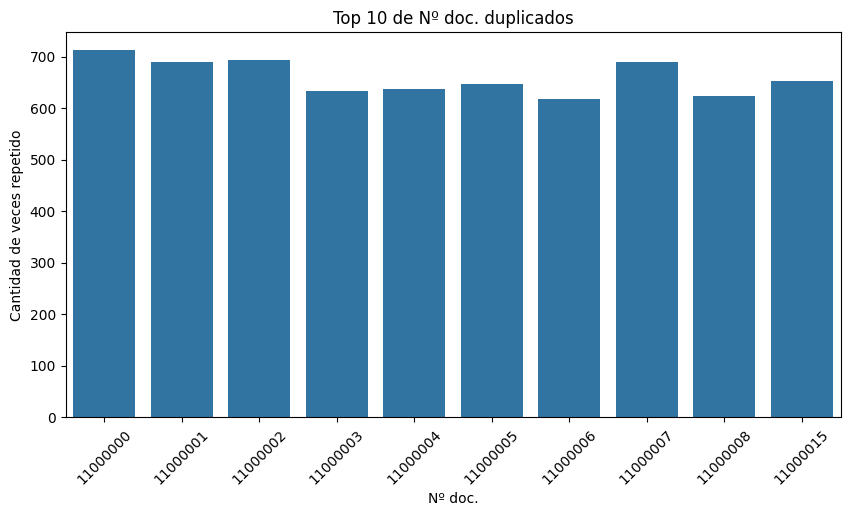

In [346]:
duplicados_contados = Facturación['Nº doc.'].value_counts()
duplicados_contados = duplicados_contados[duplicados_contados > 1]

plt.figure(figsize=(10,5))
sns.barplot(x=duplicados_contados.index[:10], y=duplicados_contados.values[:10])
plt.xticks(rotation=45)
plt.xlabel("Nº doc.")
plt.ylabel("Cantidad de veces repetido")
plt.title("Top 10 de Nº doc. duplicados")
plt.show()

Efectivamente, no lo puedo tomar como referencia porque hay numeros que se repiten varias veces.

Tomaré una muestra pequeña para tratar de determinar campos diferentes que me permitan armar un ID único.


In [347]:
duplicados = Facturación[Facturación.duplicated(subset=['Nº doc.'], keep=False)]

# Agrupar por "Nº doc." y mostrar solo aquellos con variaciones en otras columnas
grupo_duplicados = duplicados.groupby('Nº doc.').filter(lambda x: x.nunique().sum() > 2)

# Tomar una muestra de 1 único "Nº doc." con sus variaciones en otras columnas
muestra = grupo_duplicados.groupby('Nº doc.').first().reset_index().sample(1)
Facturación[Facturación['Nº doc.'] == muestra['Nº doc.'].values[0]]

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
2886,AR02,TEPG,2583,ALUMINIO INGENIERIA S.A.,DR,11001754,"90,000,108.00",2009-04-21,2009-04-21,"163918,00",ARS,"1,00","163918,00",ARS,"44684,05",2009-05-06,-15,2009-04-21,Si,2009,Abril,Factura,SI,Argentina
8111,BR03,290,1766,PETROLEO BRASILEIRO S A PETROBRAS,DR,11001754,"12,000,050.00",2010-06-24,2010-06-24,"5885,05",BRL,"1,00","5885,05",BRL,"3286,27",2010-07-24,20,2010-08-13,No,2010,Junio,Factura,SI,Brasil
72080,AR02,TEPG,102,ACERO S.A.I.C.,DR,11001754,"12,003,561.00",2006-05-30,2006-05-30,"530097,79",ARS,"1,00","530097,79",ARS,"173394,99",2006-06-14,16,2006-06-30,Si,2006,Mayo,Factura,SI,Argentina
72081,AR02,51,102,ACERO S.A.I.C.,DB,11001754,"12,000,151.00",2012-05-09,2012-05-09,"4762,32",ARS,"1,00","4762,32",ARS,"1077,71",2012-05-24,49,2012-07-12,Si,2012,Mayo,Factura,SI,Argentina
80377,AR02,TE01,119,YPF S.A.,DB,11001754,"12,000,674.00",2023-03-13,2023-03-13,"970337,51",ARS,"1,00","970337,51",ARS,"4832,29",2023-04-12,7,2023-04-19,No,2023,Marzo,Factura,SI,Argentina
81723,AR02,GG00,140,IMPRIPOST TECNOLOGIAS S.A.,DB,11001754,"12,000,291.00",2017-06-16,2017-06-16,"189315,12",ARS,"1,00","189315,12",ARS,"11851,13",2017-07-06,57,2017-09-01,Si,2017,Junio,Factura,SI,Argentina
81724,AR02,TEPA,140,IMPRIPOST TECNOLOGIAS S.A.,DB,11001754,"12,001,521.00",2018-04-12,2018-04-12,"352702,10",ARS,"1,00","352702,10",ARS,"17494,02",2018-04-17,65,2018-06-21,Si,2018,Abril,Factura,SI,Argentina
82435,AR02,CO01,158,EXIROS AR SA,DR,11001754,"12,000,090.00",2008-06-23,2008-06-23,"1020,11",ARS,"1,00","1020,11",ARS,"338,47",2008-07-08,6,2008-07-14,Si,2008,Junio,Factura,SI,Argentina
84687,AR02,346,192,INGENIERIA CIA.TEC.INT. SACI - PANEDIL,DB,11001754,"12,001,378.00",2014-06-10,2014-06-10,"2391750,13",ARS,"1,00","2391750,13",ARS,"294185,27",2014-06-25,5,2014-06-30,Si,2014,Junio,Factura,SI,Argentina
88232,AR02,TEPA,1262,NORGAV S.A.C.I.I.F.F. y S. y M.,DR,11001754,"12,003,578.00",2010-06-29,2010-06-29,"165750,00",ARS,"1,00","165750,00",ARS,"42358,80",2010-06-29,0,2010-06-29,No,2010,Junio,Factura,SI,Argentina


De la muestra saco en limpio que podría generar un ID único con los campos Año, SOc., Clase y N° Doc., para que sea más prolijo uso guión bajo como separador.


In [348]:
Facturación['indice'] = Facturación['Año'].astype(str) + '_' + Facturación['Soc.'].astype(str) + '_' + Facturación['Clase'].astype(str) + '_' + Facturación['Nº doc.'].astype(str)

# Establecer el nuevo índice correctamente
Facturación = Facturación.set_index('indice')

# Mostrar las primeras filas
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2007_01CA_DR_11000000,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000000,"90,000,000.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CA_DR_11000001,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000001,"90,000,001.00",2007-12-31,2007-12-31,"700000,00",CAD,"1,00","700000,00",CAD,"700000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CA_DR_11000002,01CA,K001,2127,JV INGENIERIA / Somervill,DR,11000002,"90,000,002.00",2007-12-31,2007-12-31,"1200000,00",CAD,"1,00","1200000,00",CAD,"1200000,00",2008-01-10,81,2008-03-31,No,2007,Diciembre,Factura,SI,Canada
2007_01CR_DR_11000014,01CR,M327,2056,REFINADORA COSTARRICENSE DE PETROLE,DR,11000014,"90,000,005.00",2007-08-31,2007-12-31,"323366,84",USD,"0,50","161068,93",CRC,"323366,84",2008-01-10,82,2008-04-01,No,2007,Agosto,Factura,SI,Costa Rica
2007_01CR_DR_11000017,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,"12,000,001.00",2007-11-30,2007-12-31,"212667,32",USD,"0,50","105929,53",CRC,"212667,32",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_IT02_DR_11000332,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,"12,000,047.00",2021-02-15,2021-02-15,"51940,50",USD,"-/1,21290","42823,40",EUR,"51940,50",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
2008_SA02_DR_11000110,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"3422,92",USD,"3,75","12835,95",SAR,"3422,92",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
2008_SA02_DR_11000110,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,NaN,2008-01-31,2008-01-31,"321,29",USD,"3,75","1204,84",SAR,"321,29",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita


Analizo el tipo de dato para realizar las transformaciones necesarias para trabajarlo

In [349]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              189760 non-null  object        
 1   Div.              189760 non-null  object        
 2   Cliente           189760 non-null  int64         
 3   Nombre Clie       189760 non-null  object        
 4   Clase             189760 non-null  object        
 5   Nº doc.           189760 non-null  int64         
 6   Doc.comp.         187829 non-null  float64       
 7   Fecha doc.        189759 non-null  datetime64[ns]
 8   Fe.contab.        189760 non-null  datetime64[ns]
 9   Importe en MD     189760 non-null  object        
 10  Mon.              189760 non-null  object        
 11  Tp.camb.ef.       189663 non-null  object        
 12  Importe en ML     189760 non-null  object        
 13  ML                189760 non-

In [350]:
Facturación[columnas_fechas].info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Fecha doc.  189759 non-null  datetime64[ns]
 1   Fe.contab.  189760 non-null  datetime64[ns]
 2   Venc.neto   189759 non-null  datetime64[ns]
 3   Compens.    187829 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 7.2+ MB


In [351]:
columnas_fechas2 = ['Fecha doc.', 'Fe.contab.', 'Venc.neto']
Facturación[Facturación[columnas_fechas2].isnull().any(axis=1)]

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
0_EC14_DB_11008674,EC14,445,9625,CHUQUITARCO CANDO ELVA LILIANA,DB,11008674,"12,000,326.00",NaT,2021-09-10,"3623,70",USD,"1,00","3623,70",USD,"3623,70",NaT,44,2021-09-15,No,0,NaN,Factura,SI,Ecuador


Luego de la transformación de las fechas, quedan Nat de manera aceptable, dado que compensación es una fecha de documentos pagados, tranquilamente pueden haber campos vacíos, ya sea por incobrabilidad o por que aún no se ha efectuado por no encontrarse vencido.

Le doy formato a algunos campos objects

In [352]:
columnas_num = ['Importe en MD', 'Tp.camb.ef.', 'Importe en ML', 'Impte.valor.ML2']
Facturación[columnas_num] = (
    Facturación[columnas_num]
    .replace({',': '', '€': '', '$': ''}, regex=True)  # Eliminar comas y símbolos monetarios
    .apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)  # Reemplazar coma por punto en cadenas
    .apply(pd.to_numeric, errors='coerce')  # Convertir los valores a numérico (float64), no numéricos se convertirán a NaN
)

Facturación[columnas_num] = Facturación[columnas_num].astype('float64')



In [353]:
columnas_str = ['Soc.', 'Cliente', 'Div.','Nombre Clie' , 'Clase', 'Mon.', 'ML', 'Soc. Relacionada', 'FACTURACIÓN', 'DENOMINACIÓN', 'País', 'Mes']
Facturación[columnas_str] = Facturación[columnas_str].astype("string")
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189760 entries, 2007_01CA_DR_11000000 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              189760 non-null  string        
 1   Div.              189760 non-null  string        
 2   Cliente           189760 non-null  string        
 3   Nombre Clie       189760 non-null  string        
 4   Clase             189760 non-null  string        
 5   Nº doc.           189760 non-null  int64         
 6   Doc.comp.         187829 non-null  float64       
 7   Fecha doc.        189759 non-null  datetime64[ns]
 8   Fe.contab.        189760 non-null  datetime64[ns]
 9   Importe en MD     189760 non-null  float64       
 10  Mon.              189760 non-null  string        
 11  Tp.camb.ef.       189264 non-null  float64       
 12  Importe en ML     189760 non-null  float64       
 13  ML                189760 non-

El campo documento de copensación es muy importante porque en mí experiencia determina si un documento se cobró, sí está pendiente de cobro, si se compensó con otros docuemntos, etc. o sí se anuló el documento, lo que significa que no se presentó al cobro y no correspondería tomarlo en cuenta en nuestro análisis.

In [354]:
Facturación['Doc.comp.'] = Facturación['Doc.comp.'].fillna(0).astype('string')

In [369]:
Facturación['Primeros_3'] = Facturación['Doc.comp.'].str[:3]

In [370]:
resumen = Facturación['Primeros_3'].value_counts().reset_index()
resumen.columns = ['Primeros_3', 'Cuenta']
resumen

,Primeros_3,Cuenta
0,120,178498
1,0.0,1931
2,301,195
3,330,166
4,100,109
5,110,99
6,302,62
7,290,54
8,331,29
9,570,20


Los documentos de compensación comenzados en 900 son anulaciones, las elimino para limpiar la base de datos y quito el filtro utilizado.

In [357]:
Facturación = Facturación[Facturación['Primeros_3'] != '900']

In [358]:
Facturación = Facturación.drop(columns=['Primeros_3'])

In [359]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181213 entries, 2007_01CR_DR_11000017 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              181213 non-null  string        
 1   Div.              181213 non-null  string        
 2   Cliente           181213 non-null  string        
 3   Nombre Clie       181213 non-null  string        
 4   Clase             181213 non-null  string        
 5   Nº doc.           181213 non-null  int64         
 6   Doc.comp.         181213 non-null  string        
 7   Fecha doc.        181212 non-null  datetime64[ns]
 8   Fe.contab.        181213 non-null  datetime64[ns]
 9   Importe en MD     181213 non-null  float64       
 10  Mon.              181213 non-null  string        
 11  Tp.camb.ef.       180738 non-null  float64       
 12  Importe en ML     181213 non-null  float64       
 13  ML                181213 non-

Leo los datos nulos de la columna Tp.camb.ef. para ver que resuelvo

In [360]:
nulos_tp_camb_ef = Facturación['Tp.camb.ef.'].isnull().sum()
nulos_tp_camb_ef

475

In [361]:
filas_nulas = Facturación[Facturación['Tp.camb.ef.'].isnull()]
filas_nulas

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2011_BR05_DS_11000023,BR05,TEPA,227,INGENIERIA CHILE S.A.,DS,11000023,12000361.0,2011-07-27,2011-07-27,"4,690,860.00",USD,NaN,"7,198,103.00",BRL,"4,690,860.00",2011-08-16,119,2011-12-13,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DH_29000008,BR05,CO02,2839,MAVERICK TUBE CORPORATION,DH,29000008,12000098.0,2011-07-25,2011-07-25,"68,880.00",USD,NaN,"107,088.00",BRL,"68,880.00",2011-08-24,-9,2011-08-15,Si,2011,Julio,Nota de Débito,SI,Brasil
2011_BR05_DS_11000025,BR05,TEPA,3081,INGENIERIA INGENIERIA Y CONSTRUCCION,DS,11000025,12000389.0,2011-07-27,2011-07-27,"1,083,764.00",USD,NaN,"1,663,031.00",BRL,"1,083,764.00",2011-08-16,126,2011-12-20,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DS_11000026,BR05,TEPA,3081,INGENIERIA INGENIERIA Y CONSTRUCCION,DS,11000026,12000390.0,2011-07-27,2011-07-27,"2,451,080.00",USD,NaN,"3,761,171.00",BRL,"2,451,080.00",2011-08-16,126,2011-12-20,Si,2011,Julio,Factura,SI,Brasil
2011_BR05_DR_11000022,BR05,374,4111,OSX WHP 1 & 2 Leasing B.V,DR,11000022,12000104.0,2011-07-25,2011-07-25,"101,916,983.00",USD,NaN,"157,971,324.00",BRL,"101,916,983.00",2011-08-24,2,2011-08-26,No,2011,Julio,Factura,SI,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020_IT02_DR_11000488,IT02,TG51,5189,CONSTRUCCIONES Y PRESTACIONES,DR,11000488,12000101.0,2020-03-27,2020-03-27,"121,268,900.00",USD,NaN,"113,462,668.00",EUR,"121,268,900.00",2020-03-27,276,2020-12-28,Si,2020,Marzo,Factura,SI,Italia
2020_IT02_DR_11000239,IT02,PR07,6273,INGENIERIA E&C S.A.,DR,11000239,12000100.0,2020-12-23,2020-12-23,"32,782,900.00",USD,NaN,"26,785,603.00",EUR,"32,782,900.00",2020-12-23,5,2020-12-28,Si,2020,Diciembre,Factura,SI,Italia
2021_IT02_DR_11000423,IT02,PR00,6273,INGENIERIA E&C S.A.,DR,11000423,12000196.0,2021-04-22,2021-04-22,"22,954,250.00",USD,NaN,"19,117,390.00",EUR,"22,954,250.00",2021-04-22,13,2021-05-05,Si,2021,Abril,Factura,SI,Italia


Lo descargo a un excel para analizarlo dado que son 475 filas.

In [362]:
filas_nulas.to_excel('filas_nulas_tp_camb_ef.xlsx', index=False)

Saco en limpio que hay valores cero en la columna Impte.valor.ML2 cosa que no correspondería porque siempre se factura un valor. En cuanto a los campos con valor, pido que me calcule el tipo de cambios dividiendo Importe en MD con Importe en ML

In [363]:
Facturación = Facturación[Facturación['Importe en MD'] != 0]

In [364]:
Facturación['Tp.camb.ef.'] = Facturación.apply(
    lambda row: row['Importe en ML'] / row['Importe en MD'] if pd.isna(row['Tp.camb.ef.']) else row['Tp.camb.ef.'],
    axis=1)
Facturación

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2007_01CR_DR_11000017,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000017,12000001.0,2007-11-30,2007-12-31,"21,266,732.00",USD,50.00,"10,592,953.00",CRC,"21,266,732.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000018,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000018,12000001.0,2007-11-30,2007-12-31,"154,854,153.00",USD,50.00,"77,132,807.00",CRC,"154,854,153.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000019,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000019,12000001.0,2007-11-30,2007-12-31,"122,701,777.00",USD,50.00,"61,117,718.00",CRC,"122,701,777.00",2008-01-10,81,2008-03-31,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000020,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000020,12000005.0,2007-11-30,2007-12-31,"1,417,782.00",USD,50.00,"706,197.00",CRC,"1,417,782.00",2008-01-10,60,2008-03-10,No,2007,Noviembre,Factura,SI,Costa Rica
2007_01CR_DR_11000021,01CR,M336,2057,Instalaciones Inabensa S.A.,DR,11000021,12000005.0,2007-11-30,2007-12-31,"10,323,610.00",USD,50.00,"5,142,187.00",CRC,"10,323,610.00",2008-01-10,60,2008-03-10,No,2007,Noviembre,Factura,SI,Costa Rica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_IT02_DR_11000332,IT02,TG51,6375,INGENIERIA Engineering Technical and,DR,11000332,12000047.0,2021-02-15,2021-02-15,"5,194,050.00",USD,0.82,"4,282,340.00",EUR,"5,194,050.00",2021-03-31,166,2021-09-13,Si,2021,Febrero,Factura,SI,Italia
2008_SA02_DR_11000110,SA02,CE11,723,TENCO BAHRAIN,DR,11000110,0.0,2008-01-31,2008-01-31,"342,292.00",USD,375.00,"1,283,595.00",SAR,"342,292.00",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita
2008_SA02_DR_11000110,SA02,GG11,723,TENCO BAHRAIN,DR,11000110,0.0,2008-01-31,2008-01-31,"32,129.00",USD,375.00,"120,484.00",SAR,"32,129.00",2008-03-01,6,NaT,Si,2008,Enero,Factura,SI,Arabia Saudita


# Análisis Exploratorio de datos

In [365]:
Facturación.sample(10)

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País
indice,,,,,,,,,,,,,,,,,,,,,,,,
2006_AR03_DR_11000064,AR03,50,104,TERNIUM ARGENTINA S.A.,DR,11000064,12000002.0,2006-06-30,2006-06-30,"26,976,961.00",ARS,100.00,"26,976,961.00",ARS,"8,791,792.00",2006-07-05,13,2006-07-18,Si,2006,Junio,Factura,SI,Argentina
2007_AR02_DR_11001410,AR02,50,104,TERNIUM ARGENTINA S.A.,DR,11001410,12002434.0,2007-03-19,2007-03-19,"5,310,181.00",ARS,100.00,"5,310,181.00",ARS,"1,723,685.00",2007-03-26,14,2007-04-09,Si,2007,Marzo,Factura,SI,Argentina
2019_IT02_DG_10000029,IT02,12,6068,GE.SAT S.C. A R.L.,DG,10000029,12000065.0,2019-11-25,2019-11-25,-191.00,EUR,100.00,-191.00,EUR,-211.00,2019-11-25,343,2020-11-02,Si,2019,Noviembre,Nota de Crédito,SI,Italia
2018_01MX_DB_11000477,01MX,M059,2548,TERNIUM MEXICO,DB,11000477,12000167.0,2018-04-09,2018-04-09,"92,746,017.00",MXN,100.00,"92,746,017.00",MXN,"5,121,435.00",2018-04-24,2,2018-04-26,Si,2018,Abril,Factura,SI,Mexico
2021_PE02_DI_29000053,PE02,442,419,COMPAÑIA OPERADORA DE GAS S.A.C.,DI,29000053,12000221.0,2021-04-20,2021-04-20,"681,043.00",USD,359.00,"2,442,899.00",PEN,"681,043.00",2021-05-20,3,2021-05-23,No,2021,Abril,Nota de Débito,SI,Peru
2022_UY11_DR_11000030,UY11,TEPA,227,INGENIERIA CHILE S.A.,DR,11000030,12000003.0,2022-12-28,2022-12-28,"89,320,000.00",USD,"4,004.00","3,576,194,160.00",UYU,"89,320,000.00",2023-01-12,261,2023-09-30,Si,2022,Diciembre,Factura,SI,Uruguay
2020_AR02_DB_11000407,AR02,51,102,ACERO S.A.I.C.,DB,11000407,12000329.0,2020-09-09,2020-09-09,"220,528,813.00",ARS,100.00,"220,528,813.00",ARS,"2,952,881.00",2020-09-16,7,2020-09-23,Si,2020,Septiembre,Factura,SI,Argentina
2013_AR16_DB_11000697,AR16,Z000,1421,ACECO TI ARGENTINA S.A.,DB,11000697,12000354.0,2013-04-30,2013-04-30,"2,128,830.00",ARS,100.00,"2,128,830.00",ARS,"412,567.00",2013-05-30,20,2013-06-19,No,2013,Abril,Factura,SI,Argentina
2011_AR10_DR_11000225,AR10,53,104,TERNIUM ARGENTINA S.A.,DR,11000225,12000119.0,2011-02-28,2011-02-28,"39,816,280.00",ARS,100.00,"39,816,280.00",ARS,"9,931,724.00",2011-04-04,-19,2011-03-16,Si,2011,Febrero,Factura,SI,Argentina


In [366]:
Facturación.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181175 entries, 2007_01CR_DR_11000017 to 2022_UY11_DR_11000026
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Soc.              181175 non-null  string        
 1   Div.              181175 non-null  string        
 2   Cliente           181175 non-null  string        
 3   Nombre Clie       181175 non-null  string        
 4   Clase             181175 non-null  string        
 5   Nº doc.           181175 non-null  int64         
 6   Doc.comp.         181175 non-null  string        
 7   Fecha doc.        181174 non-null  datetime64[ns]
 8   Fe.contab.        181175 non-null  datetime64[ns]
 9   Importe en MD     181175 non-null  float64       
 10  Mon.              181175 non-null  string        
 11  Tp.camb.ef.       181175 non-null  float64       
 12  Importe en ML     181175 non-null  float64       
 13  ML                181175 non-

In [372]:
Facturación.isnull().sum()

,0
Soc.,0
Div.,0
Cliente,0
Nombre Clie,0
Clase,0
Nº doc.,0
Doc.comp.,0
Fecha doc.,1
Fe.contab.,0
Importe en MD,0


No hay valores nulos que afecten nuestro análisis.

In [367]:
suma_por_pais = Facturación.pivot_table(index='País', columns='Soc. Relacionada', values='Impte.valor.ML2', aggfunc='sum')

suma_por_pais = suma_por_pais.applymap(lambda x: f"USD {x:,.2f}")

suma_por_pais

<ipython-input-367-63f2243d2434>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  suma_por_pais = suma_por_pais.applymap(lambda x: f"USD {x:,.2f}")


Soc. Relacionada,No,Si
País,,
Arabia Saudita,"USD 7,263,386,116.00","USD 1,182,983,773.00"
Argentina,"USD 847,893,769,481.00","USD 464,448,010,880.00"
Bahamas,"USD 35,972,728,317.00","USD 18,604,299,141.00"
Belgica,"USD 4,251,834,453.00","USD 945,176,840.00"
Bolivia,"USD 15,932,079,025.00","USD 35,859,817.00"
Brasil,"USD 337,277,858,490.00","USD 44,140,671,190.00"
Canada,"USD 1,296,875,455.00","USD 187,052,540.00"
Chile,"USD 477,060,194,389.00","USD 18,479,651,593.00"
Colombia,"USD 56,515.00","USD 1,586,438,656.00"


##Análisis univariado

In [379]:
media_ingresos = Facturación['Impte.valor.ML2'].mean()
mediana_ingresos = Facturación['Impte.valor.ML2'].median()
moda_ingresos = Facturación['Impte.valor.ML2'].mode()[0]
print("Media de ingresos: USD {:,.2f}".format(media_ingresos))
print("Mediana de ingresos: USD {:,.2f}".format(mediana_ingresos))
print("Moda de ingresos: USD {:,.2f}".format(moda_ingresos))

Media de ingresos: USD 22,170,046.25
Mediana de ingresos: USD 1,386,982.00
Moda de ingresos: USD 58,000.00


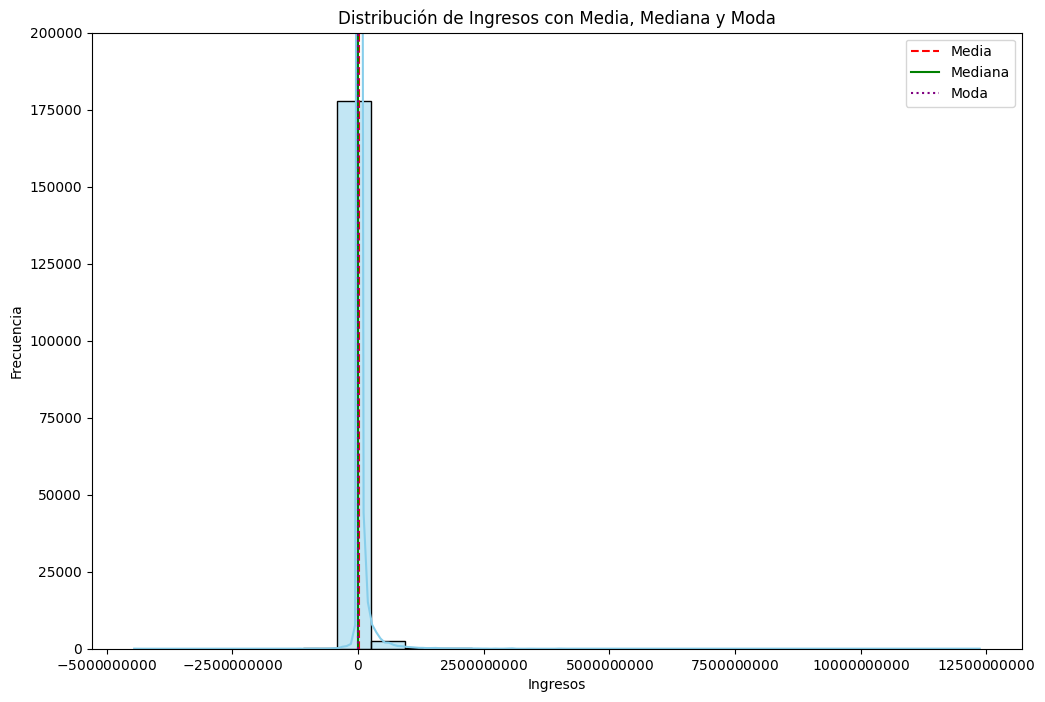

In [388]:
plt.figure(figsize=(12, 8))
sns.histplot(Facturación['Impte.valor.ML2'], kde=True, color='skyblue', bins=25)
plt.axvline(media_ingresos, color='red', linestyle='--', label='Media')
plt.axvline(mediana_ingresos, color='green', linestyle='-', label='Mediana')
plt.axvline(moda_ingresos, color='purple', linestyle=':', label='Moda')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de Ingresos con Media, Mediana y Moda')
plt.ylim(0, 200000)
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

Medimos el sesgo.

In [393]:
sesgo_Impte_valor_ML2 = Facturación['Impte.valor.ML2'].skew()


In [396]:
print("Skewness de la distribución de Importe en USD:", sesgo_Impte_valor_ML2)

Skewness de la distribución de Importe en USD: 24.859472069134714


La disparidad entre la media y la mediana, junto con el alto sesgo positivo, sugiere una distribución de ingresos altamente asimétrica, influenciada por valores extremadamente altos (posibles outliers). Esto indica que hay algunos ingresos muy grandes que elevan la media significativamente por encima de la mediana.

Además, la moda considerablemente menor que la media y la mediana revela que la mayoría de los ingresos son relativamente bajos, mientras que unos pocos ingresos muy altos afectan la distribución general. Este tipo de distribución es común en situaciones de grandes desigualdades, con pocos valores extremadamente altos y muchos valores bajos.

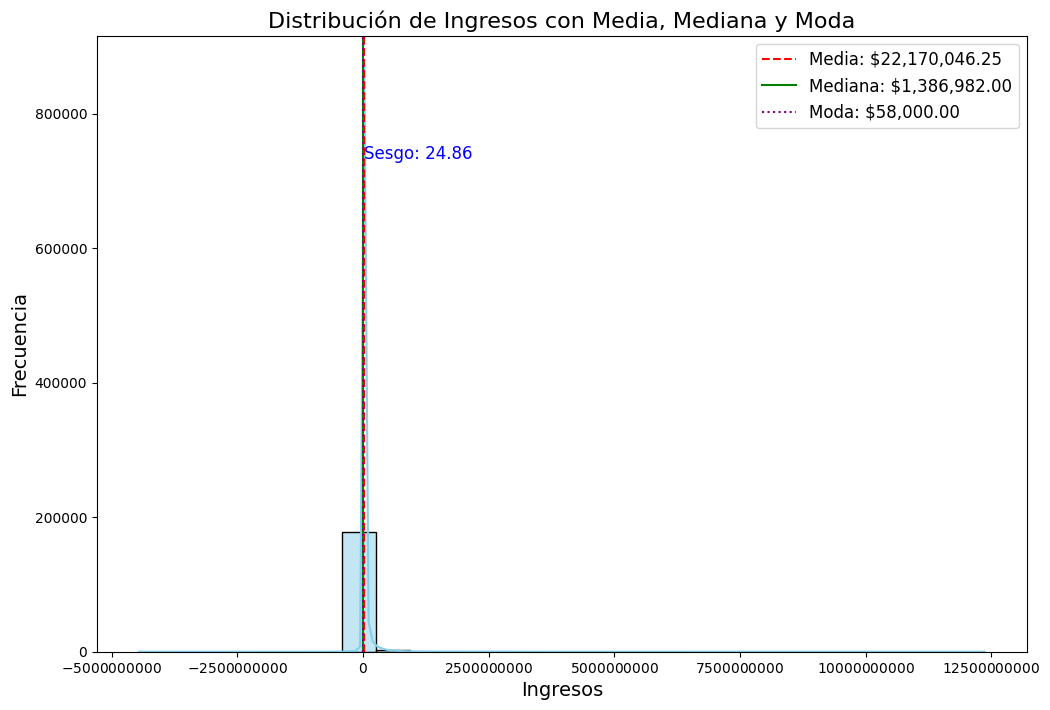

In [398]:
plt.figure(figsize=(12, 8))
sns.histplot(Facturación['Impte.valor.ML2'], kde=True, color='skyblue', bins=25)

plt.axvline(media_ingresos, color='red', linestyle='--', label=f'Media: ${media_ingresos:,.2f}')
plt.axvline(mediana_ingresos, color='green', linestyle='-', label=f'Mediana: ${mediana_ingresos:,.2f}')
plt.axvline(moda_ingresos, color='purple', linestyle=':', label=f'Moda: ${moda_ingresos:,.2f}')

plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(fontsize=12)
plt.title('Distribución de Ingresos con Media, Mediana y Moda', fontsize=16)

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(useOffset=False, style='plain', axis='x')

plt.text(x=media_ingresos, y=0.8 * plt.ylim()[1], s=f'Sesgo: {sesgo_Impte_valor_ML2:.2f}', color='blue', fontsize=12)

plt.show()

In [399]:
curtosis = stats.kurtosis(Facturación['Impte.valor.ML2'])

In [400]:
print(f'Curtosis: {curtosis}')

Curtosis: 1236.38905939448


La alta curtosis en los datos indica una distribución de ingresos con frecuentes valores atípicos extremos, lo cual es típico en escenarios de grandes desigualdades económicas donde una minoría tiene ingresos significativamente superiores al promedio. Esto resalta la importancia de considerar la dispersión y la presencia de outliers al analizar y tomar decisiones basadas en estos datos.

In [405]:
# Cálculo del rango
rango = np.max(Facturación['Impte.valor.ML2']) - np.min(Facturación['Impte.valor.ML2'])
print("Rango:", "${:,.2f}".format(rango))

# Cálculo de la varianza
varianza = np.var(Facturación['Impte.valor.ML2'])
print("Varianza:", "${:,.2f}".format(varianza))

# Cálculo de la desviación estándar
desviacion_estandar = np.std(Facturación['Impte.valor.ML2'])
print("Desviación Estándar:", "${:,.2f}".format(desviacion_estandar))

Rango: $16,821,368,249.00
Varianza: $19,901,139,346,960,296.00
Desviación Estándar: $141,071,398.05


In [406]:
valores = [rango, varianza, desviacion_estandar]
etiquetas = ['Rango', 'Varianza', 'Desviación Estándar']

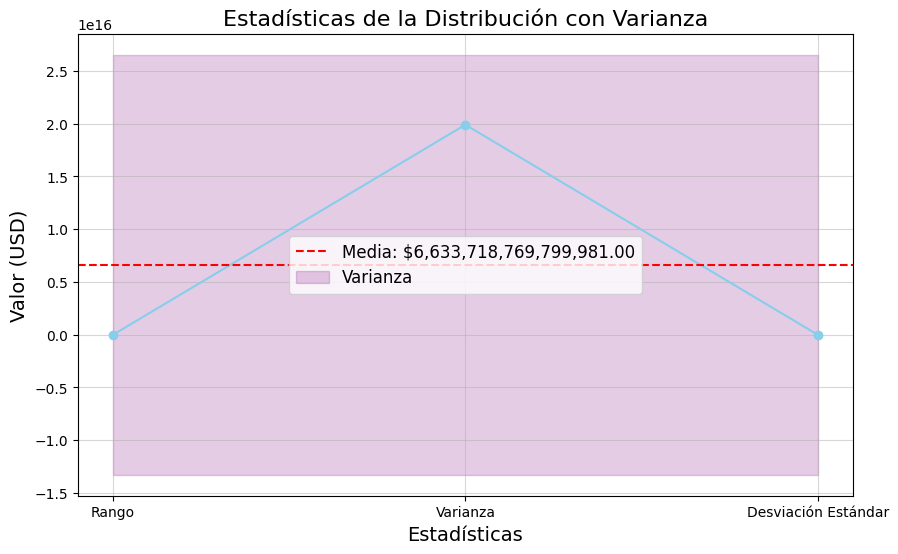

In [410]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Representar los datos
plt.plot(etiquetas, valores, marker='o', color='skyblue', linestyle='-')

# Indicar la media (Aquí usamos la media de los valores)
media = np.mean(valores)
plt.axhline(media, color='red', linestyle='--', label=f'Media: ${media:,.2f}')

# Representar la varianza como área
plt.fill_between(range(len(valores)),
                 [media - varianza] * len(valores),
                 [media + varianza] * len(valores),
                 color='purple', alpha=0.2,
                 label='Varianza')

# Configuración de la gráfica
plt.title("Estadísticas de la Distribución con Varianza", fontsize=16)
plt.xlabel("Estadísticas", fontsize=14)
plt.ylabel("Valor (USD)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

La combinación de un rango muy amplio, alta varianza y alta desviación estándar indica que los ingresos en tu conjunto de datos presentan una gran variabilidad y dispersión. Esta distribución sugiere la presencia de ingresos extremadamente altos que influyen significativamente en las estadísticas globales, típica en situaciones de grandes desigualdades económicas.

# Preprocesamiento de datos

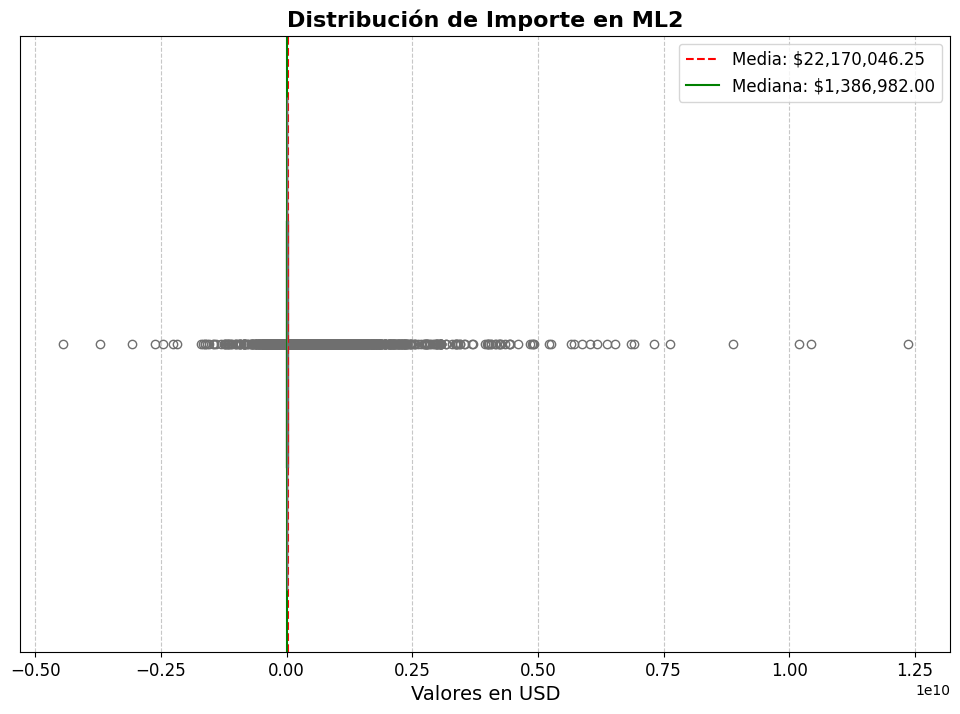

In [416]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=Facturación['Impte.valor.ML2'], color='skyblue')

# Configuración de la gráfica
plt.title("Distribución de Importe en ML2", fontsize=16, weight='bold')
plt.xlabel("Valores en USD", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([])  # Eliminar etiquetas del eje y para hacer el gráfico más limpio
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir información extra
media = Facturación['Impte.valor.ML2'].mean()
mediana = Facturación['Impte.valor.ML2'].median()

# Línea para la media
plt.axvline(media, color='red', linestyle='--', label=f'Media: ${media:,.2f}')

# Línea para la mediana
plt.axvline(mediana, color='green', linestyle='-', label=f'Mediana: ${mediana:,.2f}')

# Añadir leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

##Identificación y Manejo de Outliers

In [423]:
print(Facturación['Impte.valor.ML2'].describe())

count          181,175.00
mean        22,170,046.25
std        141,071,787.37
min     -4,454,025,132.00
25%            202,660.00
50%          1,386,982.00
75%          8,273,133.00
max     12,367,343,117.00
Name: Impte.valor.ML2, dtype: float64


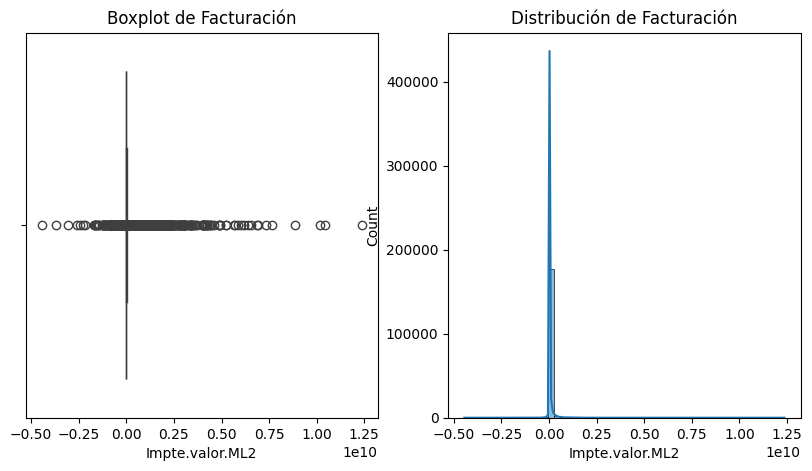

In [425]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x=Facturación['Impte.valor.ML2'])
plt.title("Boxplot de Facturación")

plt.subplot(1,2,2)
sns.histplot(Facturación['Impte.valor.ML2'], bins=50, kde=True)
plt.title("Distribución de Facturación")

plt.show()

In [429]:
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

outliers_iqr = Facturación[(Facturación['Impte.valor.ML2'] < lower_bound) | (Facturación['Impte.valor.ML2'] > upper_bound)]
print(outliers_iqr)

Empty DataFrame
Columns: [Soc., Div., Cliente, Nombre Clie, Clase, Nº doc., Doc.comp., Fecha doc., Fe.contab., Importe en MD, Mon., Tp.camb.ef., Importe en ML, ML, Impte.valor.ML2, Venc.neto, Demora, Compens., Soc. Relacionada, Año, Mes, DENOMINACIÓN, FACTURACIÓN, País, Primeros_3, Z-score, Z_Score]
Index: []


In [428]:
Facturación['Z_Score'] = stats.zscore(Facturación['Impte.valor.ML2'])
outliers_z = Facturación[abs(Facturación['Z_Score']) > 2.5]

outliers_z

,Soc.,Div.,Cliente,Nombre Clie,Clase,Nº doc.,Doc.comp.,Fecha doc.,Fe.contab.,Importe en MD,Mon.,Tp.camb.ef.,Importe en ML,ML,Impte.valor.ML2,Venc.neto,Demora,Compens.,Soc. Relacionada,Año,Mes,DENOMINACIÓN,FACTURACIÓN,País,Primeros_3,Z-score,Z_Score
indice,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007_01MX_DR_11000006,01MX,M331,2036,"MITSUBISHI HEAVY INDUSTRIES, LTD-ME",DR,11000006,12000053.0,2007-12-13,2007-12-31,"1,009,695,201.00",USD,"1,087.00","10,971,549,993.00",MXN,"1,009,695,201.00",2008-01-05,230,2008-08-22,No,2007,Diciembre,Factura,SI,Mexico,120,7.00,7.00
2005_01MX_DR_11000190,01MX,MG61,2043,CARBONSER,DR,11000190,12000191.0,2005-08-23,2007-12-31,"609,500,000.00",USD,"1,087.00","6,622,948,900.00",MXN,"609,500,000.00",2008-01-05,147,2008-05-31,Si,2005,Agosto,Factura,SI,Mexico,120,4.16,4.16
2008_01MX_DR_11000029,01MX,M331,2076,"MITSUBISHI HEAVY INDUSTRIES,",DR,11000029,12000052.0,2008-08-13,2008-08-13,"518,942,420.00",USD,999.00,"5,183,041,208.00",MXN,"518,942,420.00",2008-09-17,-17,2008-08-31,No,2008,Agosto,Factura,SI,Mexico,120,3.52,3.52
2008_01MX_DR_11000068,01MX,M331,2076,"MITSUBISHI HEAVY INDUSTRIES,",DR,11000068,12000149.0,2008-09-25,2008-09-25,"380,876,460.00",USD,"1,073.00","4,085,433,261.00",MXN,"380,876,460.00",2008-10-30,29,2008-11-28,No,2008,Septiembre,Factura,SI,Mexico,120,2.54,2.54
2008_01MX_DR_11000071,01MX,M331,2076,"MITSUBISHI HEAVY INDUSTRIES,",DR,11000071,12000054.0,2008-02-07,2008-02-25,"629,451,426.00",USD,"1,083.00","6,816,266,547.00",MXN,"629,451,426.00",2008-03-23,152,2008-08-22,No,2008,Febrero,Factura,SI,Mexico,120,4.30,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016_PE07_DR_11000000,PE07,410,258,TRANSPORTADORA DE GAS DEL PERU S.A.,DR,11000000,12000002.0,2016-07-01,2016-07-01,"566,400,000.00",USD,329.00,"1,864,588,800.00",PEN,"566,400,000.00",2016-07-31,-11,2016-07-20,No,2016,Julio,Factura,SI,Peru,120,3.86,3.86
2015_PE07_DR_11000016,PE07,410,258,TRANSPORTADORA DE GAS DEL PERU S.A.,DR,11000016,12000009.0,2015-12-01,2015-12-01,"685,580,000.00",USD,338.00,"2,314,518,080.00",PEN,"685,580,000.00",2015-12-31,-21,2015-12-10,No,2015,Diciembre,Factura,SI,Peru,120,4.70,4.70
2016_PE07_DR_11000019,PE07,410,258,TRANSPORTADORA DE GAS DEL PERU S.A.,DR,11000019,12000011.0,2016-01-05,2016-01-05,"540,204,000.00",USD,343.00,"1,852,899,720.00",PEN,"540,204,000.00",2016-02-04,-22,2016-01-13,No,2016,Enero,Factura,SI,Peru,120,3.67,3.67


El método IQR no detecta outliers, lo que sugiere que los valores atípicos están distribuidos de manera que el rango intercuartil (IQR) no los captura.

El método Z-score sí detectó 2090 outliers con un umbral de 2.5, lo que representa aproximadamente el 1.15% del total de registros (2090 / 181175).

##Analizo los Outliers

In [430]:
print(outliers_z[['Impte.valor.ML2']].describe())

        Impte.valor.ML2
count          2,090.00
mean     798,747,433.22
std      987,338,401.98
min   -4,454,025,132.00
25%      445,844,674.25
50%      605,386,698.00
75%      923,264,323.50
max   12,367,343,117.00


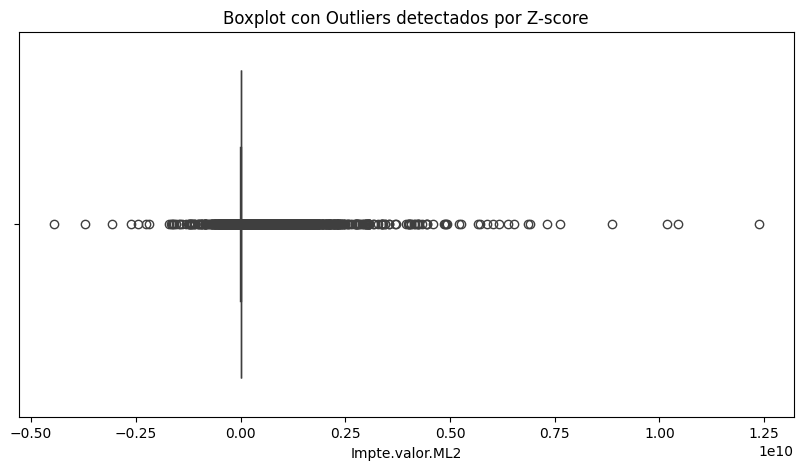

In [431]:
plt.figure(figsize=(10,5))
sns.boxplot(x=Facturación['Impte.valor.ML2'])
plt.title("Boxplot con Outliers detectados por Z-score")
plt.show()

Por lo que estuve averiguando, dado que los datos son reales, voy a transformarlos con el metodo Min-Max Scaling, porque no quiero perder los datos y quiero mantener una relación sin distorición.

In [433]:
# Crear el escalador
scaler = MinMaxScaler()

# Aplicar transformación Min-Max
Facturación['Impte.valor.ML2_Scaled'] = scaler.fit_transform(Facturación[['Impte.valor.ML2']])

# Verificar resultados
print(Facturación[['Impte.valor.ML2', 'Impte.valor.ML2_Scaled']].describe())

        Impte.valor.ML2  Impte.valor.ML2_Scaled
count        181,175.00              181,175.00
mean      22,170,046.25                    0.27
std      141,071,787.37                    0.01
min   -4,454,025,132.00                    0.00
25%          202,660.00                    0.26
50%        1,386,982.00                    0.26
75%        8,273,133.00                    0.27
max   12,367,343,117.00                    1.00


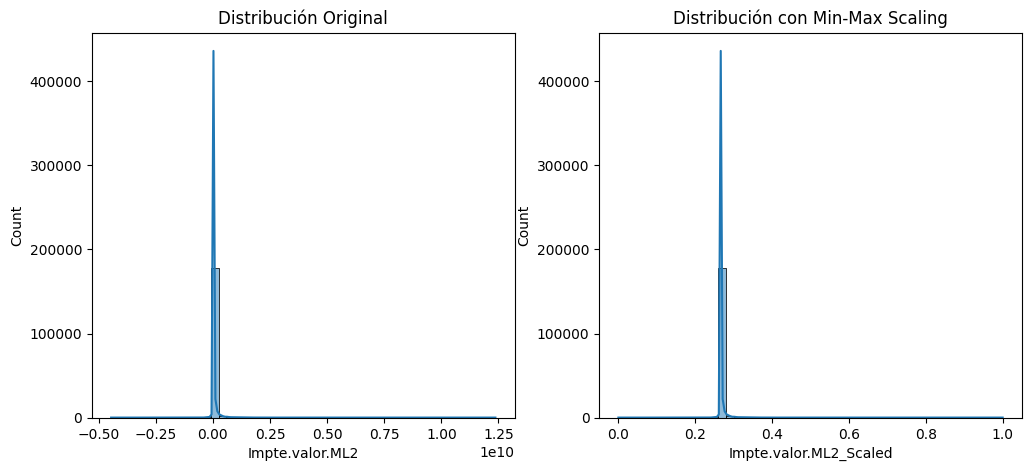

In [434]:
plt.figure(figsize=(12,5))

# Histograma de la variable original
plt.subplot(1,2,1)
sns.histplot(Facturación['Impte.valor.ML2'], bins=50, kde=True)
plt.title("Distribución Original")

# Histograma de la variable escalada
plt.subplot(1,2,2)
sns.histplot(Facturación['Impte.valor.ML2_Scaled'], bins=50, kde=True)
plt.title("Distribución con Min-Max Scaling")

plt.show()

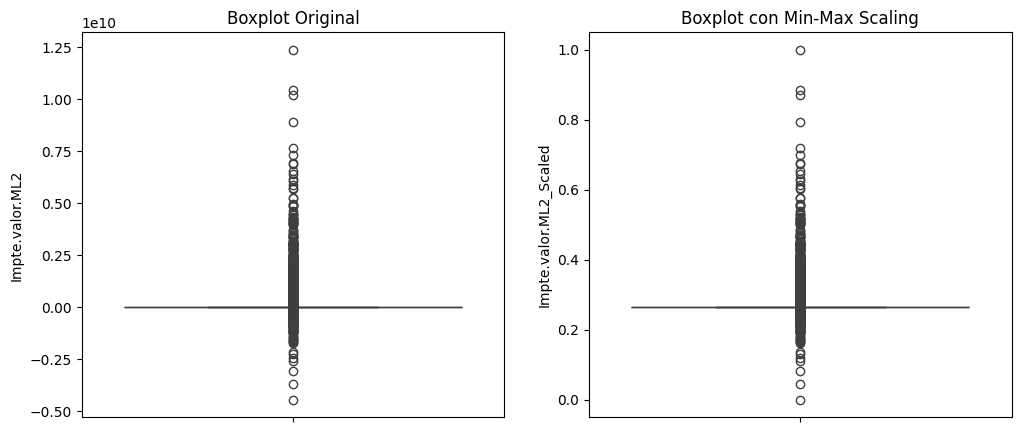

In [435]:
plt.figure(figsize=(12,5))

# Boxplot de la variable original
plt.subplot(1,2,1)
sns.boxplot(y=Facturación['Impte.valor.ML2'])
plt.title("Boxplot Original")

# Boxplot de la variable escalada
plt.subplot(1,2,2)
sns.boxplot(y=Facturación['Impte.valor.ML2_Scaled'])
plt.title("Boxplot con Min-Max Scaling")

plt.show()

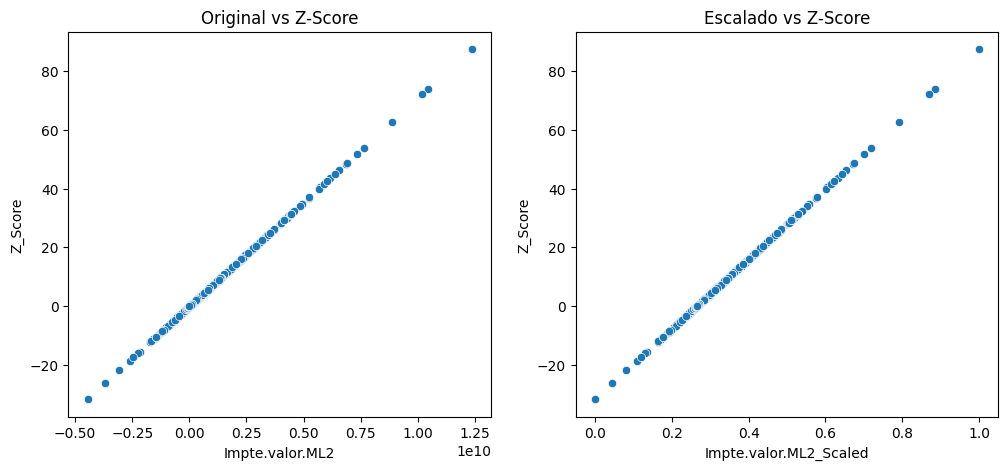

In [436]:
plt.figure(figsize=(12,5))

# Scatter de la variable original
plt.subplot(1,2,1)
sns.scatterplot(x=Facturación['Impte.valor.ML2'], y=Facturación['Z_Score'])
plt.title("Original vs Z-Score")

# Scatter de la variable escalada
plt.subplot(1,2,2)
sns.scatterplot(x=Facturación['Impte.valor.ML2_Scaled'], y=Facturación['Z_Score'])
plt.title("Escalado vs Z-Score")

plt.show()

In [437]:
Facturación['Impte.valor.ML2_Log'] = np.log1p(Facturación['Impte.valor.ML2'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Feature Selection

# Modelos

# Optimización de modelos

# Conclusiones Finales